In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

data = pd.read_csv("carc.dat", sep = "\s+", header=None)

y = data[1]

for i in range(1, 13):
    globals()["x" + str(i)] = data[i+1]

x = pd.DataFrame(data=[globals()["x" + str(r)] for r in range(2, 13)]).transpose()

for j in [3, 4]:
    g = []
    for v in x[j]:
        try: g.append(int(v)+1)
        except ValueError:
            g.append(1)
    x[j] = g

for u in [5, 6, 12]:
    x[u] = x[u].astype(float)

for u in list(range(7, 12)) + [13]:
    x[u] = x[u].astype(np.int64)

lasso_regress = linear_model.Lars(fit_intercept = True, normalize = True, fit_path=True).fit(np.array(x), np.array(y))

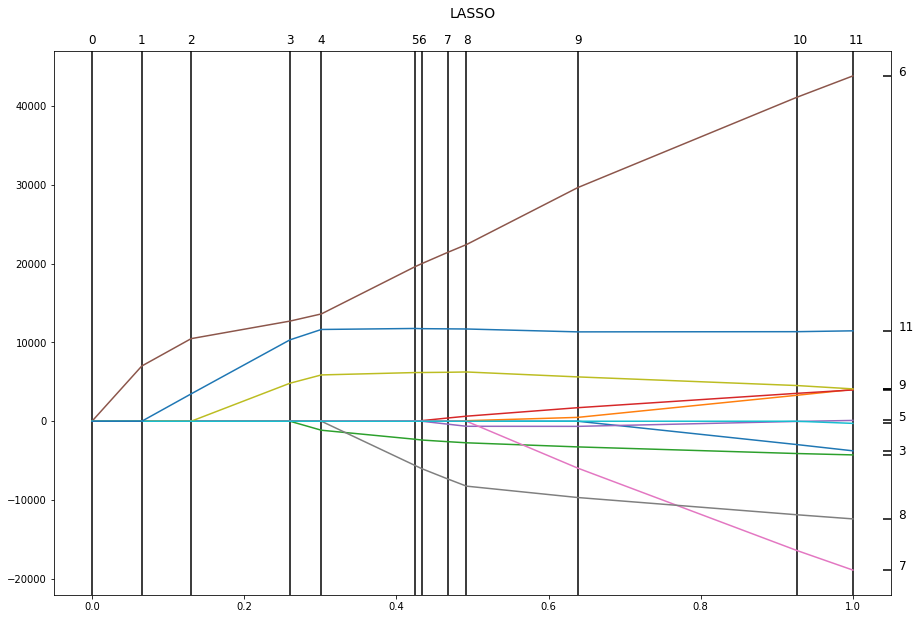

In [71]:
lasso_path = np.sum(np.abs(lasso_regress.coef_path_.T), axis=1)
lasso_path /= lasso_path[-1]

fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(lasso_path, lasso_regress.coef_path_.T)

ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])

ax.vlines(lasso_path, ymin, ymax)
ax.hlines(lasso_regress.coef_path_.T[-1], xmax-0.01, xmax)

for i in [6, 11, 9, 5, 3, 8, 7]:
    plt.text(xmax + 0.01, lasso_regress.coef_path_.T[-1][i-1], str(i), fontsize=12)
for i in range(0, len(lasso_path)):
    plt.text(lasso_path[i]-0.005, ymax+1000, str(i), fontsize=12)
    
plt.title("LASSO", y = 1.05, fontsize=14)

plt.show()